In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('water_potability.csv')

In [44]:
# Check the number of rows and columns in the dataset
num_rows, num_columns = data.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 3276
Number of columns: 10


In [45]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [46]:
# Display column names and their data types
print("Column names and their types:")
print(data.dtypes)

# Count of each data type
print("\nCount of each data type:")
print(data.dtypes.value_counts())


Column names and their types:
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

Count of each data type:
float64    9
int64      1
Name: count, dtype: int64


# Data cleaning

In [47]:
# Remove duplicate entries from the dataset
data_no_duplicates = data.drop_duplicates()

# Check the number of rows before and after removing duplicates
print(f"Number of rows before removing duplicates: {len(data)}")
print(f"Number of rows after removing duplicates: {len(data_no_duplicates)}")

# Calculate the number of duplicates removed
duplicates_removed = len(data) - len(data_no_duplicates)
print(f"Number of duplicate rows removed: {duplicates_removed}")

# Update the original dataframe with the deduplicated data
data = data_no_duplicates.reset_index(drop=True)

print("\nDataset has been updated with duplicates removed.")


Number of rows before removing duplicates: 3276
Number of rows after removing duplicates: 3276
Number of duplicate rows removed: 0

Dataset has been updated with duplicates removed.


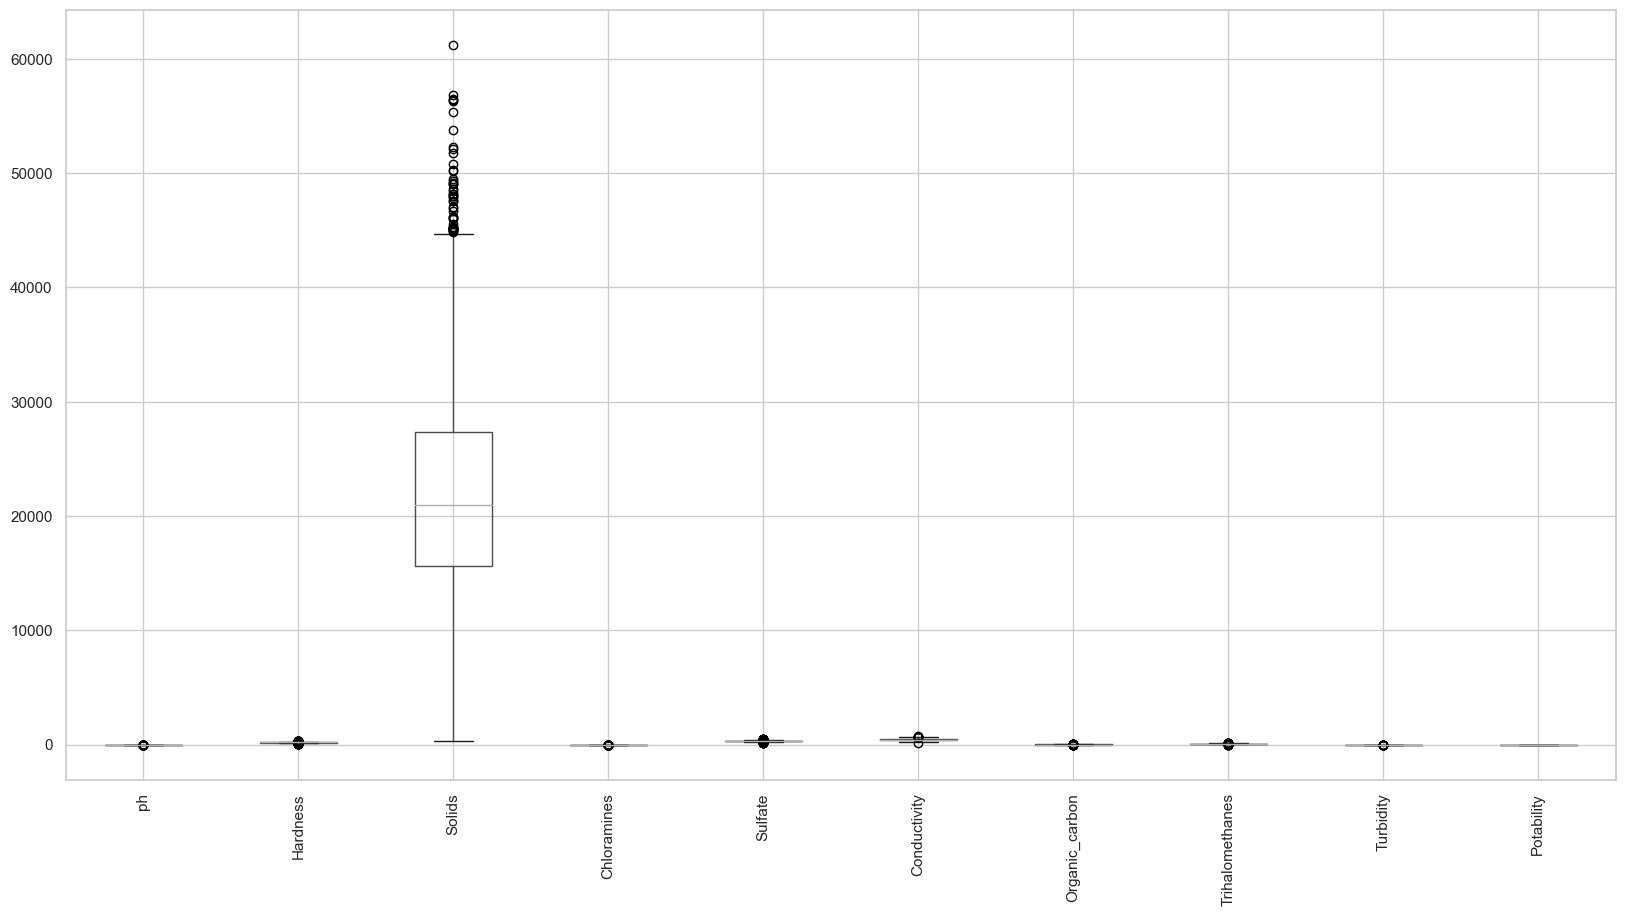

In [48]:
# Check if there are any outliers in the data
data.boxplot(rot=90, figsize = (20,10))
plt.show()


In [49]:
data.shape

(3276, 10)

In [50]:
# Check the presence of missing values
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [51]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Display the columns with missing values along with their percentage
print("Columns with missing values:")
print(missing_percentage[missing_percentage > 0])

Columns with missing values:
ph                 14.987790
Sulfate            23.840049
Trihalomethanes     4.945055
dtype: float64


In [52]:
# Check the presence of duplicate values
concrete_df_missval = data.copy() 
isduplicates = False

for x in concrete_df_missval.columns:
    concrete_df_missval[x] = concrete_df_missval[x].astype(str).str.replace(".", "")
    result = concrete_df_missval[x].astype(str).str.isalnum() # Check whether all characters are alphanumeric
    if False in result.unique():
        isduplicates = True
        print('For column "{}" unique values are {}'.format(x, concrete_df_missval[x].unique()))
        print('\n')
        
if not isduplicates:
    print('No duplicates in this dataset')

No duplicates in this dataset


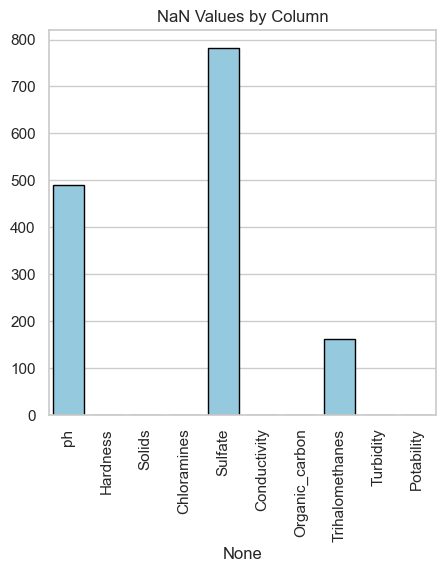

In [53]:
isna_sum = data.isna().sum()
plt.figure(figsize=(5, 5))
sns.barplot(x=isna_sum.index, y=isna_sum.values, color='skyblue', edgecolor='black')
plt.title('NaN Values by Column')
plt.xticks(rotation=90)
plt.show()

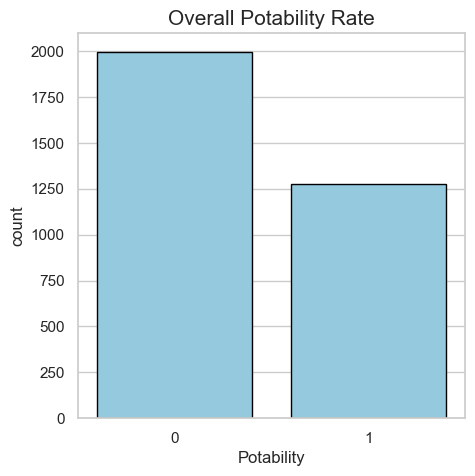

In [54]:
# Check target feature
plt.figure(figsize=(5,5))
plt.title('Overall Potability Rate', fontsize=15)
sns.countplot(data=data, x=data['Potability'], color='skyblue', edgecolor='black')

plt.show()

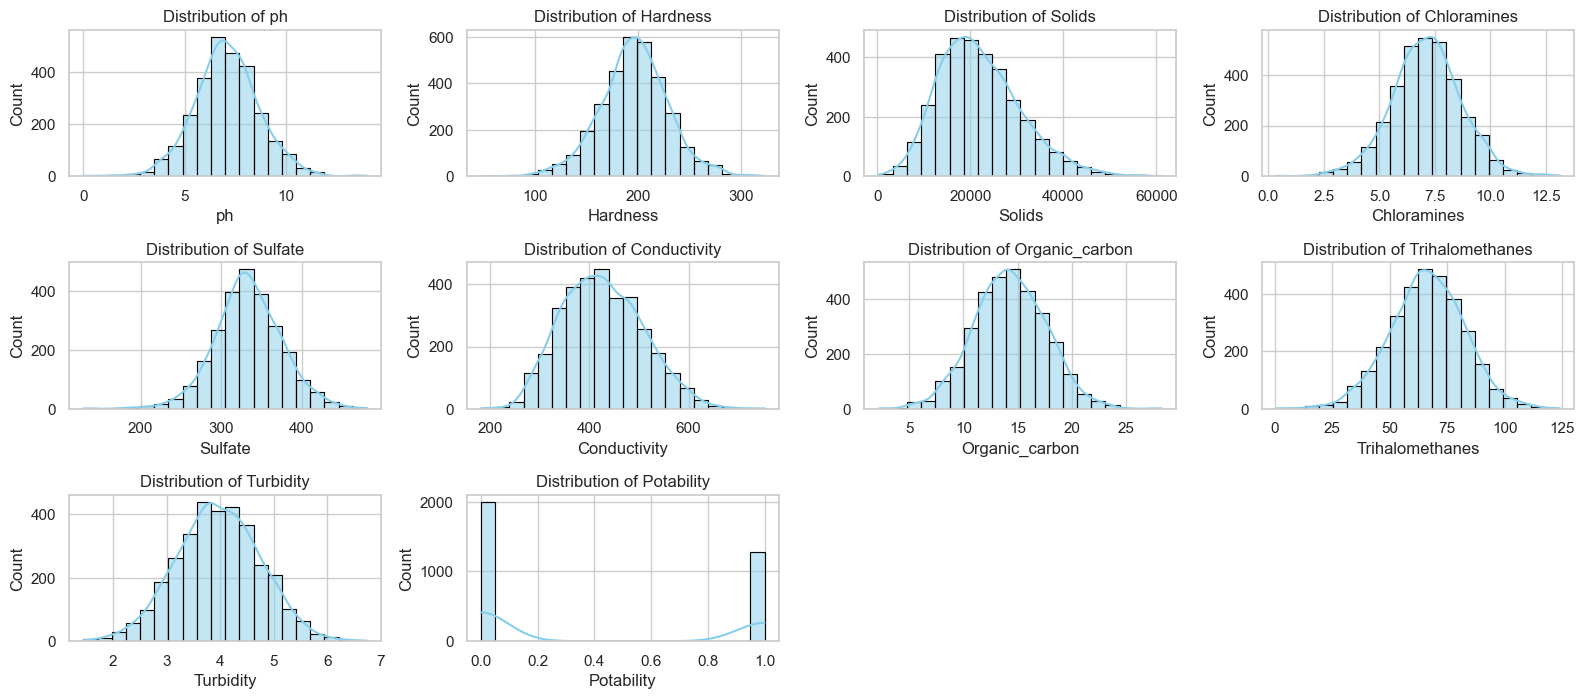

In [55]:
# Check distribution of each feature with Hist Plot

plt.figure(figsize=(16, 9))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

o = 1
for i, col in enumerate(data.columns):
    plt.subplot(4, 4, o)
    sns.histplot(data=data, x=col, kde=True, color='skyblue', edgecolor='black', bins=20)
    plt.title(f'Distribution of {col}')
    o += 1

# Display the plots
plt.tight_layout()
plt.show()

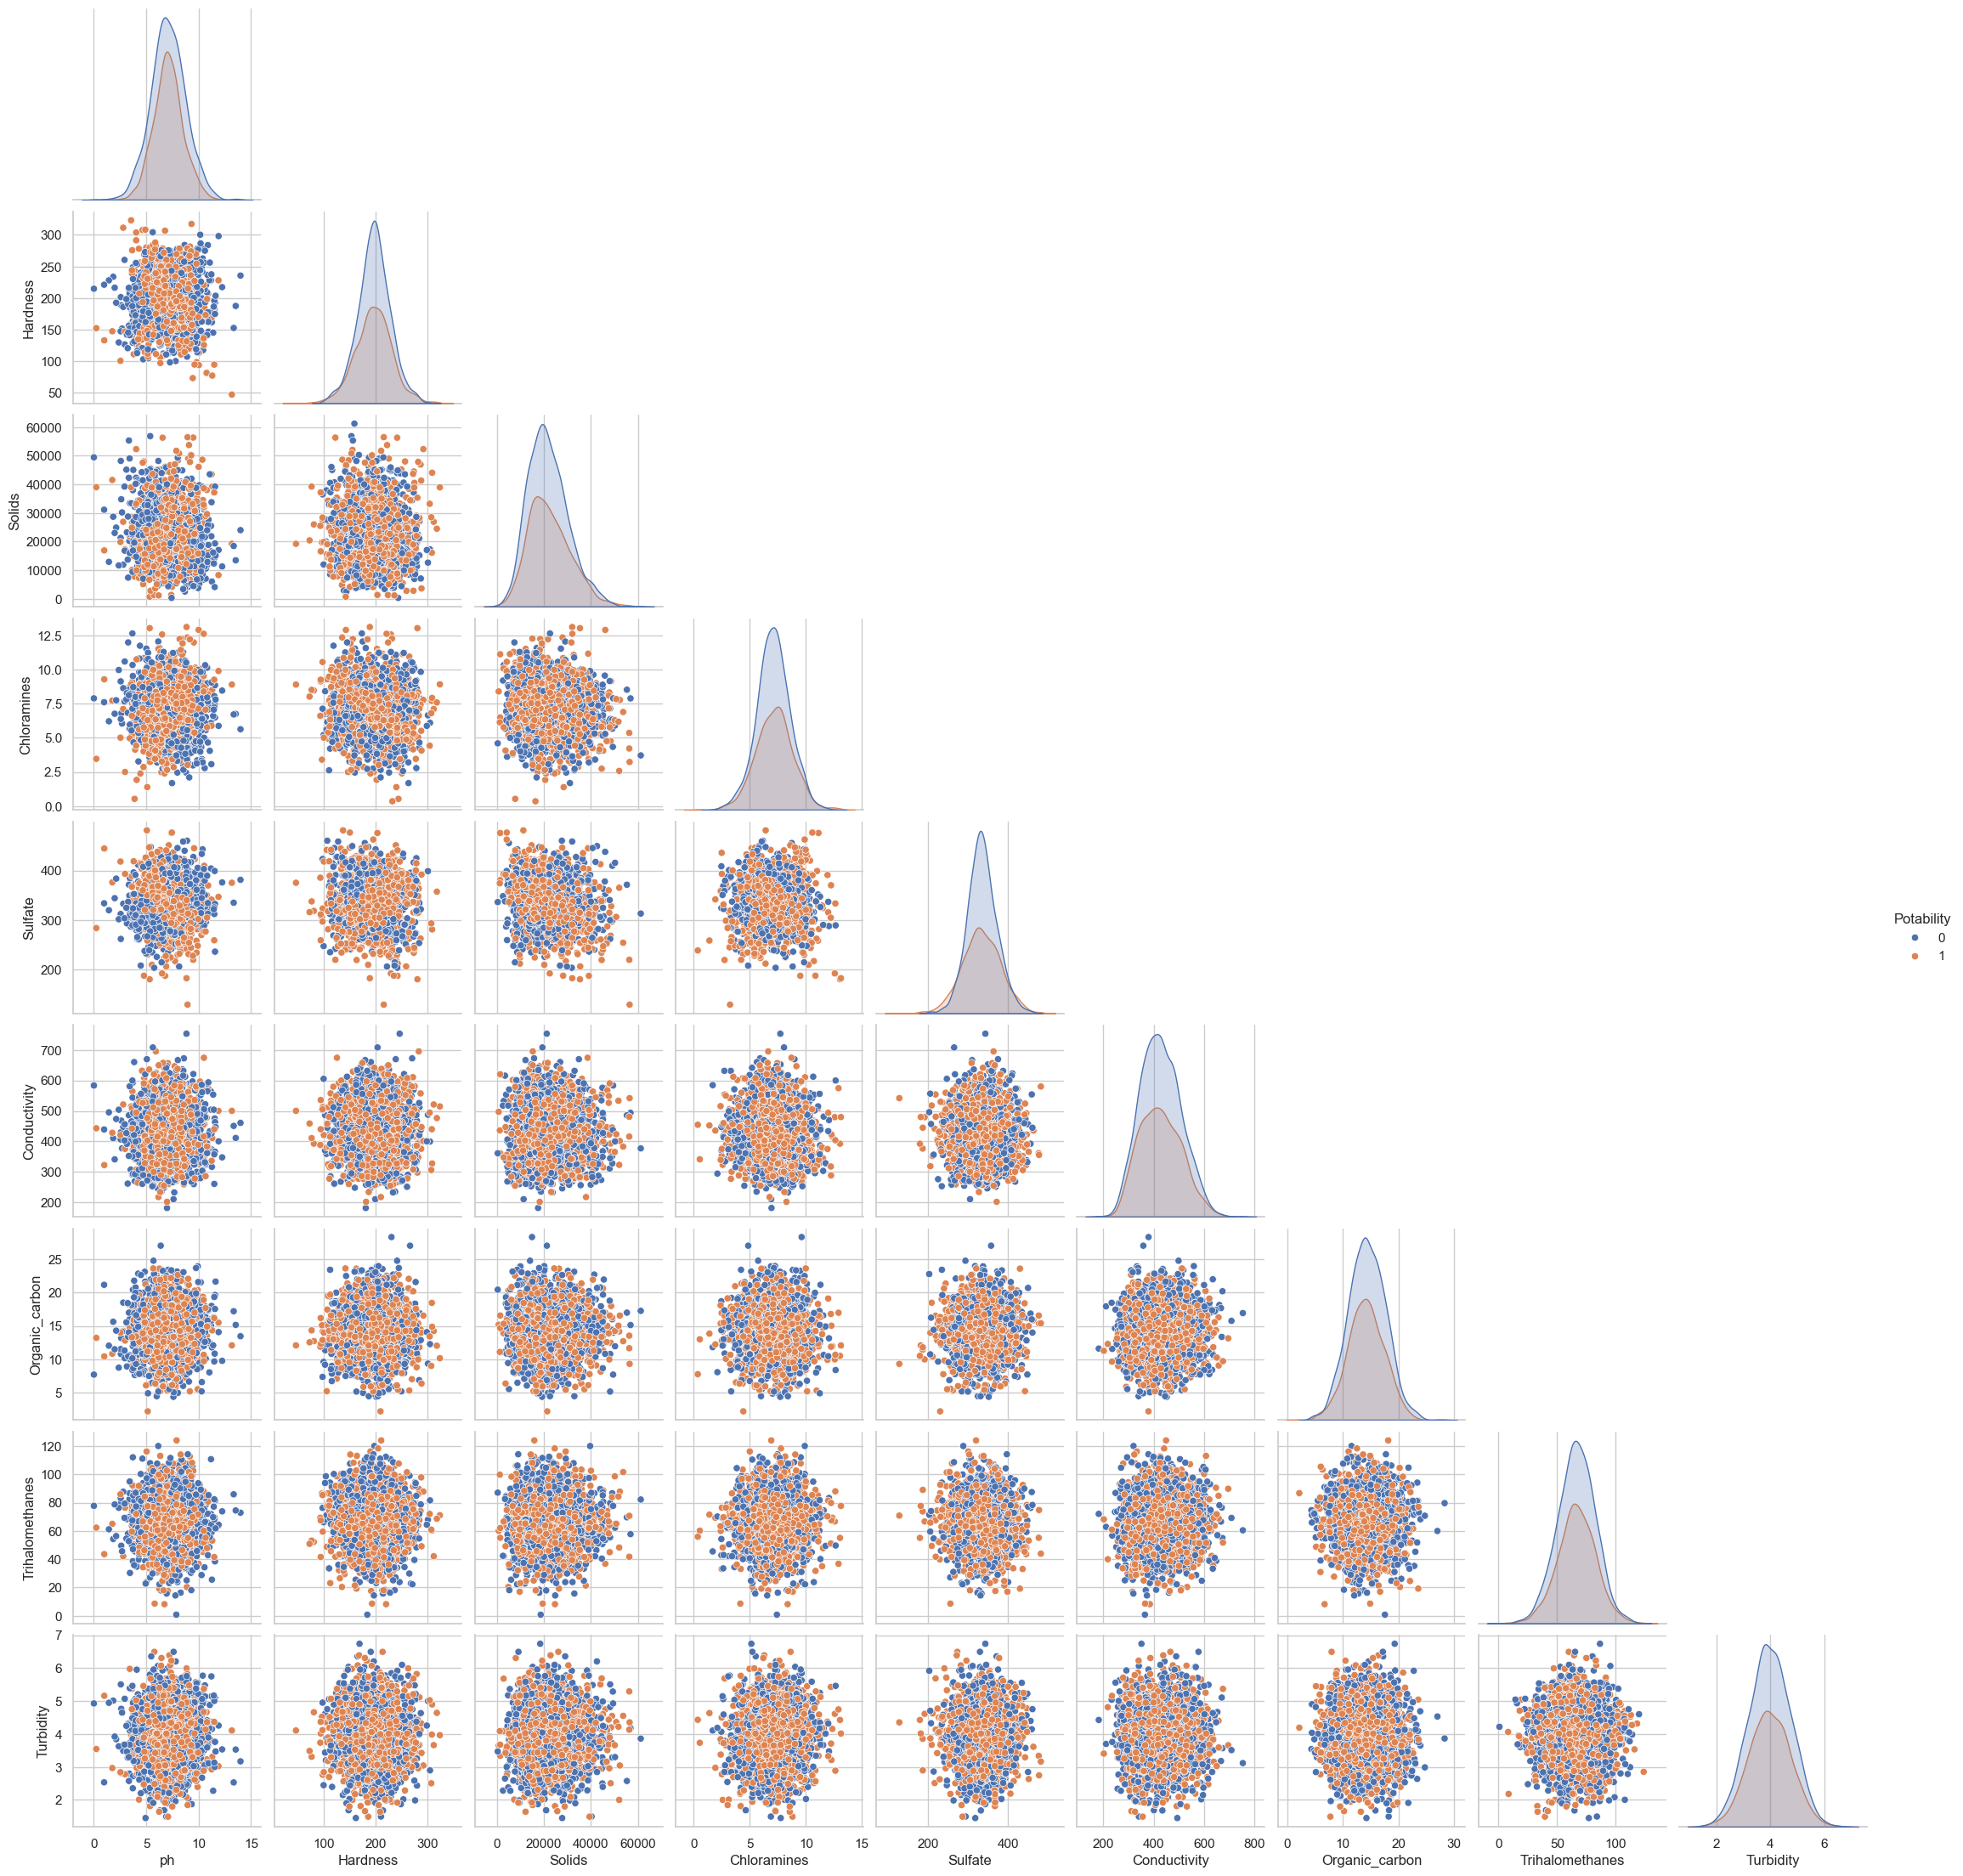

In [56]:
# visualize relationships between numerical columns
sns.pairplot(data, hue = "Potability", corner = True)
plt.show()

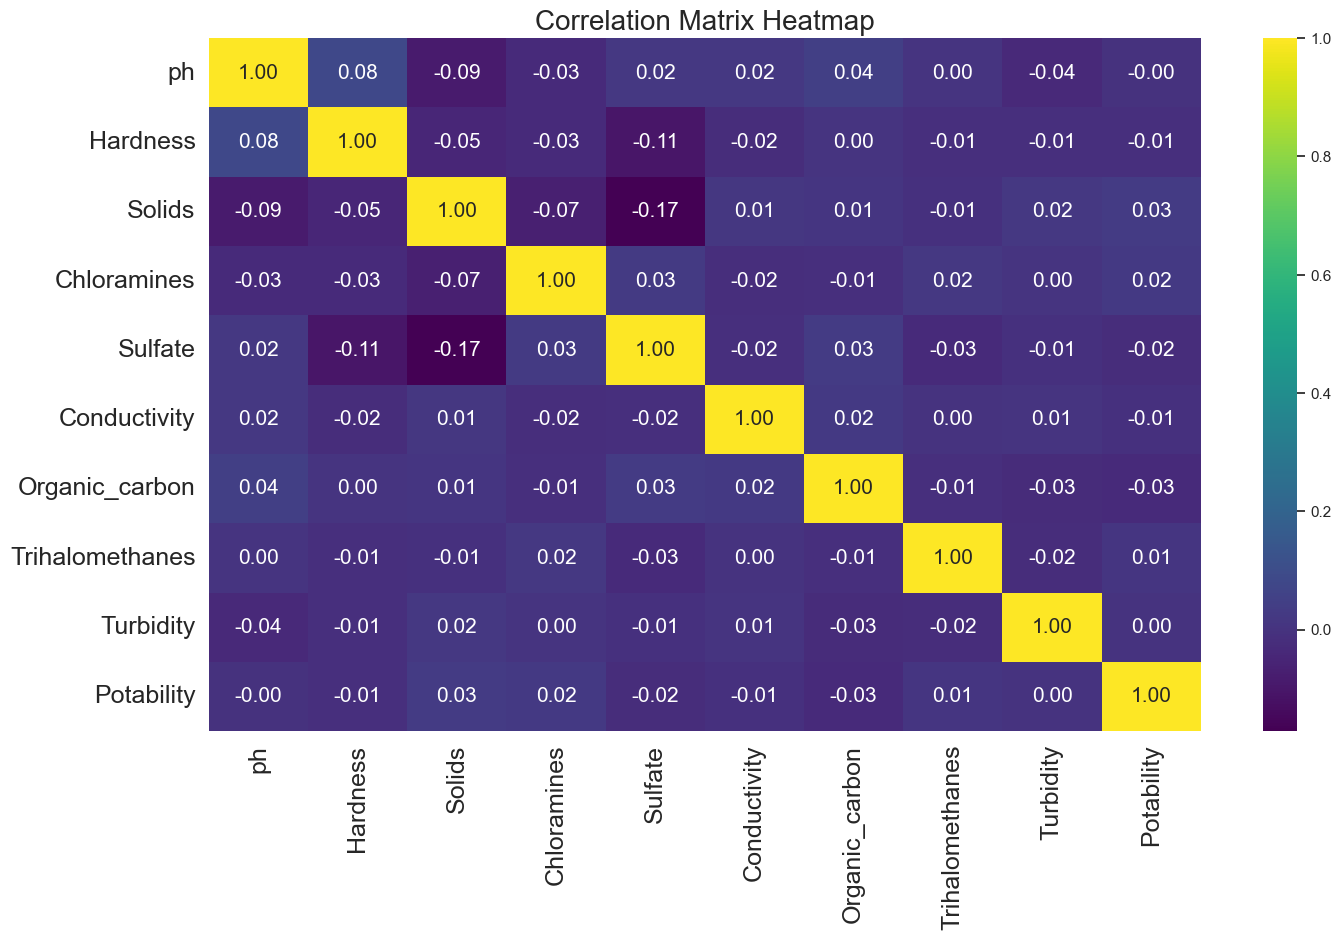

In [57]:
# Check correlation of each features
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), cbar=True, square= False, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='viridis')
plt.title("Correlation Matrix Heatmap", fontdict={'size': 20})
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.show()

In [58]:
# check which parameters are correlated with "Potability"
df_corr = data.corr()
df_corr["Potability"].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

In [59]:
# Check the NaN of the train set
column_with_nan = data.columns[data.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(round(data[i].isnull().sum()*100/len(data), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 5)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(
    x="Percent_NaN",
    y="Column",
    data=tab,
    edgecolor="black",
    color="skyblue")

p.set_title("Percent of NaN per column of the dataset\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=15)
p.set_ylabel("Features", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

([0, 1, 2],
 [Text(0, 0, 'Sulfate'), Text(0, 1, 'ph'), Text(0, 2, 'Trihalomethanes')])

In [60]:
# List NaN Columns
nan_columns = data.columns[data.isna().any()]
nan_columns

Index(['ph', 'Sulfate', 'Trihalomethanes'], dtype='object')

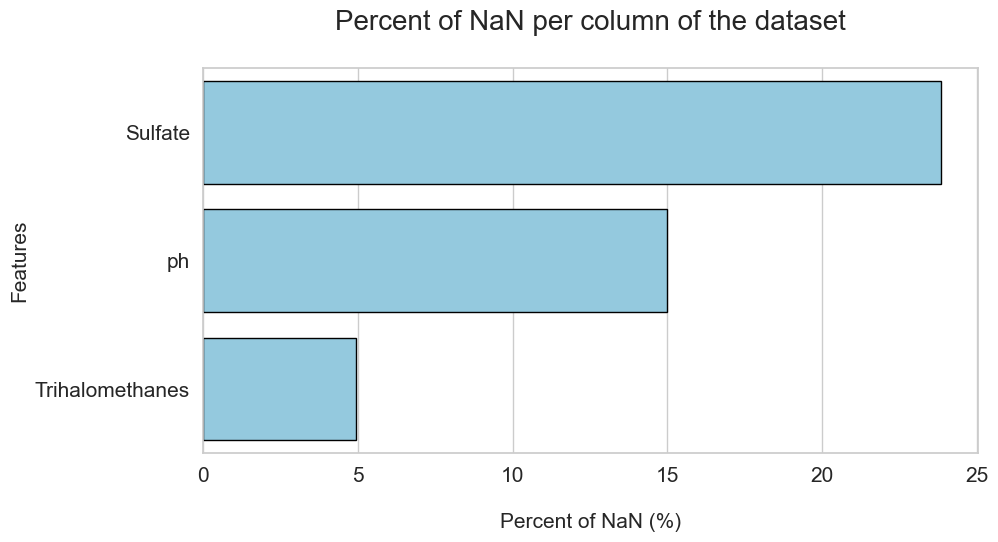

In [61]:
plt.show()

In [62]:
data.to_csv("raw_feature.csv", index=False)

# Feature engineering and Feature selection

In [63]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_normalized = sc.fit_transform(data)

In [64]:
data_normalized = pd.DataFrame(data_normalized)

In [65]:
data_normalized

,0,1,2,3,4,5,6,7,8,9
0,NaN,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,NaN,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,NaN,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3272,0.557775,0.530016,0.279263,0.603473,NaN,0.368912,0.678284,NaN,0.254915,1.0
3273,0.672822,0.465486,0.539101,0.547807,NaN,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,NaN,0.387157,0.343638,0.622659,0.616120,1.0


In [66]:
data_normalized.to_csv("raw_feature_normalized.csv", index=False)

In [67]:
# Create a new feature: Total Dissolved Solids (TDS) as a composite of Solids and Hardness
data['TDS'] = data['Solids'] + data['Hardness']

# Create a new feature: pH Level Category
data['pH_Category'] = pd.cut(data['ph'], bins=[0, 6.5, 7.5, 14], labels=[0, 1, 2])

# Create a new feature: Chloramine to Sulfate Ratio
data['Chloramine_Sulfate_Ratio'] = data['Chloramines'] / (data['Sulfate'] + 1e-5)  # Adding a small value to avoid division by zero

# Create a new feature: Hardness to TDS Ratio
data['Hardness_TDS_Ratio'] = data['Hardness'] / (data['TDS'] + 1e-5)  # Adding a small value to avoid division by zero

In [68]:
# Move the 'Portability' column to the last position
data = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'TDS', 'pH_Category', 'Chloramine_Sulfate_Ratio', 'Hardness_TDS_Ratio', 'Potability']]
data.to_csv("engineered_feature.csv", index=False)

In [69]:
data_normalized = sc.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized)

In [70]:
data_normalized.to_csv("engineered_feature_normalized.csv", index=False)

In [71]:
# identify and handling outliers
def outlier_analysis_df(df, col):
    outlier_dict = {}

    # column to check outlier
    column_data = df[col]

    sorted_data = sorted(column_data)

    # Calculate Q1 and Q3 and IQR value
    q1 = np.percentile(sorted_data, 25)
    q3 = np.percentile(sorted_data, 75)
    iqr = q3 - q1

    alt_sinir = q1 - 1.5 * iqr
    ust_sinir = q3 + 1.5 * iqr

    # Find Outliers
    outliers = [x for x in sorted_data if x < alt_sinir or x > ust_sinir]
    df_copy = df.copy()
    df_copy[col] = np.where((df_copy[col] < alt_sinir) | (df_copy[col] > ust_sinir), (q1 + q3) / 2, df_copy[col])

    outlier_dict[col] = outliers

    return df_copy, outlier_dict

In [72]:
df_without_outliers, outliers_dict = outlier_analysis_df(data, 'Solids')
data = df_without_outliers

In [73]:
# drop the features with lowest correlation value 
data.drop(["ph", "Trihalomethanes", "Hardness", "Turbidity"], axis=1)

,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,TDS,pH_Category,Chloramine_Sulfate_Ratio,Hardness_TDS_Ratio,Potability
0,20791.318981,7.300212,368.516441,564.308654,10.379783,20996.209436,NaN,0.019810,0.009758,0
1,18630.057858,6.635246,NaN,592.885359,15.180013,18759.480778,0,NaN,0.006899,0
2,19909.541732,9.275884,NaN,418.606213,16.868637,20133.777992,2,NaN,0.011137,0
3,22018.417441,8.059332,356.886136,363.266516,18.436524,22232.790835,2,0.022582,0.009642,0
4,17978.986339,6.546600,310.135738,398.410813,11.558279,18160.087848,2,0.021109,0.009973,0
...,...,...,...,...,...,...,...,...,...,...
3271,21499.726212,7.166639,359.948574,526.424171,13.894419,47774.673339,0,0.019910,0.004054,1
3272,17329.802160,8.061362,NaN,392.449580,19.903225,17523.355372,2,NaN,0.011045,1
3273,33155.578218,7.350233,NaN,432.044783,11.039070,33331.340865,2,NaN,0.005273,1
3274,11983.869376,6.303357,NaN,402.883113,11.168946,12214.473134,0,NaN,0.018880,1


In [74]:
from sklearn.impute import SimpleImputer
# fill missing value with mean of the column
impute = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(impute.fit_transform(data))
df_imputed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,20996.209436,1.033046,0.019810,0.009758,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,18759.480778,0.000000,0.021669,0.006899,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,20133.777992,2.000000,0.021669,0.011137,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,22232.790835,2.000000,0.022582,0.009642,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,18160.087848,2.000000,0.021109,0.009973,0.0


In [75]:
df_imputed.to_csv("engineered_features_cleaned.csv", index=False)
data = df_imputed

In [76]:
# Delete outlier using kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data)
labels = kmeans.labels_
df_kmeans = data[labels == 1]
df_kmeans.reset_index(inplace = True)

df_kmeans.to_csv("selected_features.csv")


In [77]:
df_kmeans

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,20996.209436,1.033046,0.019810,0.009758,0.0
1,1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,18759.480778,0.000000,0.021669,0.006899,0.0
2,2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,20133.777992,2.000000,0.021669,0.011137,0.0
3,3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,22232.790835,2.000000,0.022582,0.009642,0.0
4,4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,18160.087848,2.000000,0.021109,0.009973,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,16136.459376,2.000000,0.020124,0.013327,1.0
1965,3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,17454.241433,1.000000,0.025313,0.011878,1.0
1966,3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,17523.355372,2.000000,0.021669,0.011045,1.0
1967,3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,12214.473134,0.000000,0.021669,0.018880,1.0


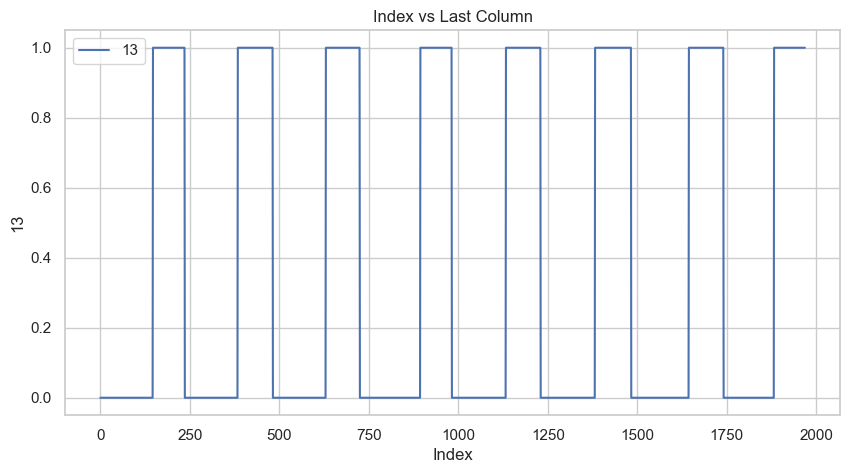

In [78]:
df_kmeans.plot(y=df_kmeans.columns[-1], use_index=True)
plt.xlabel('Index')
plt.ylabel(df_kmeans.columns[-1])
plt.title('Index vs Last Column')
plt.show()

# Decision Tree model development

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [80]:
def accuracy(X_train, X_test, y_train, y_test):
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_dtc = dtc.predict(X_test)
    return accuracy_score(y_test, y_dtc)

In [81]:
def train_and_eval_DTC_model(df):
    # Train & Test Model
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    return accuracy(X_train, X_test, y_train, y_test)

In [82]:
df = pd.read_csv("raw_feature.csv")
df2 = pd.read_csv("raw_feature_normalized.csv")
df3 = pd.read_csv("engineered_feature.csv")
df4 = pd.read_csv("engineered_feature_normalized.csv")
df5 = pd.read_csv("selected_features.csv")
df5 = df5.sample(frac=1)

In [88]:
scores = pd.DataFrame(columns = ["raw", "raw_normalized", "engineered_ft", "engineered_ft_nor", "selected_ft"],
                    index = ["accuracy"])
scores.iloc[:, 0] = train_and_eval_DTC_model(df)
scores.iloc[:, 1] = train_and_eval_DTC_model(df2)
scores.iloc[:, 2] = train_and_eval_DTC_model(df3)
scores.iloc[:, 3] = train_and_eval_DTC_model(df4)
scores.iloc[:, 4] = train_and_eval_DTC_model(df5)

In [89]:
# display comparison table
scores

,raw,raw_normalized,engineered_ft,engineered_ft_nor,selected_ft
accuracy,0.572737,0.560529,0.601221,0.591048,0.99154
